In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import math
from datetime import datetime

#import dataset
from google.colab import drive
drive.mount('/content/drive')
full_data = pd.read_csv('/content/drive/MyDrive/ML PROJECT/DATA FILE/ML EL Dataset.csv')
data=pd.DataFrame(full_data)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Karnataka,Hassan,Arasikere,Local,Cereals,5.0,2690.0,2690.0,2690.0,5/26/2022
1,Karnataka,Hassan,Arasikere,Local,Cereals,4.0,2725.0,2725.0,2725.0,4/19/2022
2,Karnataka,Hassan,Arasikere,Local,Cereals,3.0,2950.0,2950.0,2950.0,3/24/2022
3,Karnataka,Hassan,Arasikere,Local,Cereals,8.0,2490.0,2835.0,2700.0,3/11/2022
4,Karnataka,Hassan,Arasikere,Local,Cereals,2.0,2411.0,2411.0,2411.0,2/18/2022


In [ ]:
df = data.drop(['state_name','group_name','market_center_name'], axis=1)
df['date']=pd.to_datetime(df['date_arrival'])
df.drop(df.columns[-2], axis=1, inplace=True)
df

,district_name,Variety,Arrival,MIN,MAX,MODAL,date
0,Hassan,Local,5.0,2690.0,2690.0,2690.0,2022-05-26
1,Hassan,Local,4.0,2725.0,2725.0,2725.0,2022-04-19
2,Hassan,Local,3.0,2950.0,2950.0,2950.0,2022-03-24
3,Hassan,Local,8.0,2490.0,2835.0,2700.0,2022-03-11
4,Hassan,Local,2.0,2411.0,2411.0,2411.0,2022-02-18
...,...,...,...,...,...,...,...
54894,Bangalore,Other,2300.0,900.0,1100.0,1000.0,2001-08-06
54895,Bangalore,Other,8.0,900.0,1100.0,1000.0,2001-08-04
54896,Bangalore,Other,10.0,900.0,1100.0,1000.0,2001-08-03
54897,Bangalore,Other,1344.0,930.0,1300.0,1115.0,2001-08-02


In [ ]:
#extracting D,M,Y from datetime
df['month']= df['date'].dt.month
df['year']= df['date'].dt.year
df['day']= df['date'].dt.day
df.drop(df.columns[-4], axis=1, inplace=True)
df

,district_name,Variety,Arrival,MIN,MAX,MODAL,month,year,day
0,Hassan,Local,5.0,2690.0,2690.0,2690.0,5,2022,26
1,Hassan,Local,4.0,2725.0,2725.0,2725.0,4,2022,19
2,Hassan,Local,3.0,2950.0,2950.0,2950.0,3,2022,24
3,Hassan,Local,8.0,2490.0,2835.0,2700.0,3,2022,11
4,Hassan,Local,2.0,2411.0,2411.0,2411.0,2,2022,18
...,...,...,...,...,...,...,...,...,...
54894,Bangalore,Other,2300.0,900.0,1100.0,1000.0,8,2001,6
54895,Bangalore,Other,8.0,900.0,1100.0,1000.0,8,2001,4
54896,Bangalore,Other,10.0,900.0,1100.0,1000.0,8,2001,3
54897,Bangalore,Other,1344.0,930.0,1300.0,1115.0,8,2001,2


In [ ]:
#encoding features
from sklearn.preprocessing import OneHotEncoder

district_encoder = OneHotEncoder()
variety_encoder = OneHotEncoder()

#transforming district
transformed = district_encoder.fit_transform(df[['district_name']])
#print(transformed.toarray())
#print(district_encoder.categories_)
df[district_encoder.categories_[0]] = transformed.toarray()
df.drop(df.columns[0], axis=1, inplace=True)
df

,Variety,Arrival,MIN,MAX,MODAL,month,year,day,Bagalkot,Bangalore,...,Kolar,Koppal,Madikeri(Kodagu),Mandya,Mangalore(Dakshin Kannad),Mysore,Raichur,Shimoga,Tumkur,Udupi
0,Local,5.0,2690.0,2690.0,2690.0,5,2022,26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Local,4.0,2725.0,2725.0,2725.0,4,2022,19,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Local,3.0,2950.0,2950.0,2950.0,3,2022,24,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Local,8.0,2490.0,2835.0,2700.0,3,2022,11,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Local,2.0,2411.0,2411.0,2411.0,2,2022,18,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894,Other,2300.0,900.0,1100.0,1000.0,8,2001,6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54895,Other,8.0,900.0,1100.0,1000.0,8,2001,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54896,Other,10.0,900.0,1100.0,1000.0,8,2001,3,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54897,Other,1344.0,930.0,1300.0,1115.0,8,2001,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#transforming variety
transformed = variety_encoder.fit_transform(df[['Variety']])
df[variety_encoder.categories_[0]] = transformed.toarray()
df.drop(df.columns[0], axis=1, inplace=True)
df

,Arrival,MIN,MAX,MODAL,month,year,day,Bagalkot,Bangalore,Belgaum,...,Local,Medium,Medium Fine,Mexican,Other,Red,Sona,Super Fine,Superior,White
0,5.0,2690.0,2690.0,2690.0,5,2022,26,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,2725.0,2725.0,2725.0,4,2022,19,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2950.0,2950.0,2950.0,3,2022,24,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,2490.0,2835.0,2700.0,3,2022,11,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2411.0,2411.0,2411.0,2,2022,18,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894,2300.0,900.0,1100.0,1000.0,8,2001,6,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54895,8.0,900.0,1100.0,1000.0,8,2001,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54896,10.0,900.0,1100.0,1000.0,8,2001,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54897,1344.0,930.0,1300.0,1115.0,8,2001,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#encoding years
def year_enc(yyyy):
    op = int(yyyy)-2000
    return int(op)

df['year'] = df['year'].apply(year_enc)
df

,Arrival,MIN,MAX,MODAL,month,year,day,Bagalkot,Bangalore,Belgaum,...,Local,Medium,Medium Fine,Mexican,Other,Red,Sona,Super Fine,Superior,White
0,5.0,2690.0,2690.0,2690.0,5,22,26,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,2725.0,2725.0,2725.0,4,22,19,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2950.0,2950.0,2950.0,3,22,24,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,2490.0,2835.0,2700.0,3,22,11,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2411.0,2411.0,2411.0,2,22,18,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894,2300.0,900.0,1100.0,1000.0,8,1,6,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54895,8.0,900.0,1100.0,1000.0,8,1,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54896,10.0,900.0,1100.0,1000.0,8,1,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54897,1344.0,930.0,1300.0,1115.0,8,1,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#normalizing Arrival values
def norm_arr(arr):
  arrop=np.log(arr)
  return(arrop)

before_norm=[]
after_norm=[]
before_norm=df['Arrival']
#log normalisation
after_norm=list(map(norm_arr,before_norm))

#putting values back in df
df['Arrival']=after_norm
df

,Arrival,MIN,MAX,MODAL,month,year,day,Bagalkot,Bangalore,Belgaum,...,Local,Medium,Medium Fine,Mexican,Other,Red,Sona,Super Fine,Superior,White
0,1.609438,2690.0,2690.0,2690.0,5,22,26,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.386294,2725.0,2725.0,2725.0,4,22,19,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.098612,2950.0,2950.0,2950.0,3,22,24,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.079442,2490.0,2835.0,2700.0,3,22,11,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.693147,2411.0,2411.0,2411.0,2,22,18,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894,7.740664,900.0,1100.0,1000.0,8,1,6,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54895,2.079442,900.0,1100.0,1000.0,8,1,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54896,2.302585,900.0,1100.0,1000.0,8,1,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54897,7.203406,930.0,1300.0,1115.0,8,1,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#making month cyclical
df['sin_month'] = np.sin(2*np.pi*df.month/12)
df['cos_month'] = np.cos(2*np.pi*df.month/12)
df.drop(df.columns[4], axis=1, inplace=True)
df

,Arrival,MIN,MAX,MODAL,year,day,Bagalkot,Bangalore,Belgaum,Bellary,...,Medium Fine,Mexican,Other,Red,Sona,Super Fine,Superior,White,sin_month,cos_month
0,1.609438,2690.0,2690.0,2690.0,22,26,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,-8.660254e-01
1,1.386294,2725.0,2725.0,2725.0,22,19,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866025,-5.000000e-01
2,1.098612,2950.0,2950.0,2950.0,22,24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,6.123234e-17
3,2.079442,2490.0,2835.0,2700.0,22,11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,6.123234e-17
4,0.693147,2411.0,2411.0,2411.0,22,18,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866025,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894,7.740664,900.0,1100.0,1000.0,1,6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01
54895,2.079442,900.0,1100.0,1000.0,1,4,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01
54896,2.302585,900.0,1100.0,1000.0,1,3,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01
54897,7.203406,930.0,1300.0,1115.0,1,2,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01


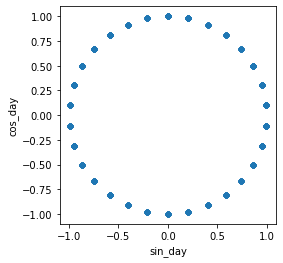

In [ ]:
#making day cyclical
df['sin_day'] = np.sin(2*np.pi*df.day/30)
df['cos_day'] = np.cos(2*np.pi*df.day/30)
df.drop(df.columns[5], axis=1, inplace=True)

df.sample(1000).plot.scatter('sin_day','cos_day').set_aspect('equal');


In [ ]:
#corr = df[col1].corr(df[col2])
#correlation of range with modal is very high, hence redundant
#drop min and max
df.drop(df.columns[1], axis=1, inplace=True)
df.drop(df.columns[1], axis=1, inplace=True)
df

,Arrival,MODAL,year,Bagalkot,Bangalore,Belgaum,Bellary,Bidar,Bijapur,Chamrajnagar,...,Other,Red,Sona,Super Fine,Superior,White,sin_month,cos_month,sin_day,cos_day
0,1.609438,2690.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,-8.660254e-01,-0.743145,0.669131
1,1.386294,2725.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.866025,-5.000000e-01,-0.743145,-0.669131
2,1.098612,2950.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,6.123234e-17,-0.951057,0.309017
3,2.079442,2700.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,6.123234e-17,0.743145,-0.669131
4,0.693147,2411.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.866025,5.000000e-01,-0.587785,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894,7.740664,1000.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01,0.951057,0.309017
54895,2.079442,1000.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01,0.743145,0.669131
54896,2.302585,1000.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01,0.587785,0.809017
54897,7.203406,1115.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.866025,-5.000000e-01,0.406737,0.913545


In [ ]:
#creating X and y variables
y = df['MODAL']
X = df.iloc[:,2:]
mylist=df['Arrival'].tolist()
X['Arrival'] = np.array(mylist)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#predictions
y_pred = regr.predict(X_test)

print(y_pred)

[1949.47830159 1861.50253076  720.90691345 ... 1195.15254855 2465.87981829
 2818.23164319]


In [ ]:
#computing rmse, mae

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('RMSE:',rmse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('MAE:',mae)

from sklearn.metrics import r2_score
print('R-squared Error',r2_score(y_test, y_pred))

RMSE: 416.41377523525966
MAE: 243.40896235520083
R-squared Error 0.6919886104559307


In [ ]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

[1787.05  1936.45   889.15  ... 1047.405 3172.25  2303.5  ]


In [ ]:
#computing rmse, mae

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('RMSE:',rmse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('MAE:',mae)

from sklearn.metrics import r2_score
print('R2 Score:',r2_score(y_test, y_pred))


RMSE: 285.354761963686
MAE: 94.9539857907234
R2 Score: 0.8553605208749532


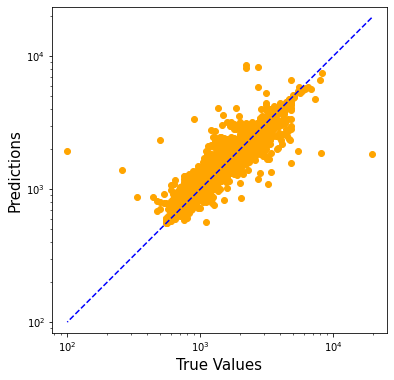

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='orange')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b--')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()